In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [3]:
file_location = os.getcwd()

In [4]:
Jan_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainJan.csv')
Feb_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainFeb.csv')
Mar_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainMar.csv')
Apr_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainApr.csv')
May_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainMay.csv')
Jun_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainJun.csv')
Jul_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainJul.csv')
Aug_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainAug.csv')
Sep_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainSep.csv')
Oct_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainOct.csv')
Nov_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainNov.csv')
Dec_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainDec.csv')

In [5]:
mainJan = pd.read_csv(Jan_path, encoding='cp949')
mainFeb = pd.read_csv(Feb_path, encoding='cp949')
mainMar = pd.read_csv(Mar_path, encoding='cp949')
mainApr = pd.read_csv(Apr_path, encoding='cp949')
mainMay = pd.read_csv(May_path, encoding='cp949')
mainJun = pd.read_csv(Jun_path, encoding='cp949')
mainJul = pd.read_csv(Jul_path, encoding='cp949')
mainAug = pd.read_csv(Aug_path, encoding='cp949')
mainSep = pd.read_csv(Sep_path, encoding='cp949')
mainOct = pd.read_csv(Oct_path, encoding='cp949')
mainNov = pd.read_csv(Nov_path, encoding='cp949')
mainDec = pd.read_csv(Dec_path, encoding='cp949')

In [6]:
month = [mainJan, mainFeb, mainMar, mainApr, mainMay,
        mainJun, mainJul, mainAug, mainSep, mainOct,
        mainNov, mainDec]

for i in month:
    i['가변수'] = i['총_사용인원'].notnull().astype(int)

In [7]:
sum_data = month[0]

for i in month[1:] :
    sum_data['총_사용인원'] += i['총_사용인원']
    sum_data['평균_사용인원'] += i['평균_사용인원']
    sum_data['가변수'] += i['가변수']

In [8]:
sum_data['평균_사용인원'] = sum_data['평균_사용인원']/sum_data['가변수']

In [9]:
total_data = pd.read_csv('data_preprocessing_file.csv', encoding='cp949')
total_data = total_data.merge(sum_data[['대여소_ID', '총_사용인원', '평균_사용인원']], on='대여소_ID', how='left')

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
total_data['동'] = le.fit_transform(total_data['동'])

In [11]:
total_data = total_data.dropna(subset=['총_사용인원'])

In [12]:
total_data.to_csv('result_data_file.csv', index=False, encoding='cp949')

In [13]:
X = total_data[['500m내_대여소가중치','500m내_버스정류소가중치',
                '500m내_지하철역가중치','500m내_교차로가중치',
                '500m내_자전거보관소가중치','500m내_자전거도로가중치',
                '500m내_고등학교가중치','500m내_대학교가중치',
                '500m내_사고건수_가중치','동','500m내_관광지_여부', 
                '500m내_휴게음식점가중치']]
Y = total_data['평균_사용인원'] 

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=300)

선형 회귀 분석

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [17]:
linear_pred = linear_model.predict(X_test)

In [18]:
linear_spuared = mean_squared_error(Y_test, linear_pred)
linear_absolute = mean_absolute_error(Y_test, linear_pred)
linear_r2_score = r2_score(Y_test, linear_pred)

랜덤 포레스트

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
randomf_model = RandomForestRegressor(n_estimators=100, random_state=300)
randomf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=300)

In [21]:
randomf_pred = randomf_model.predict(X_test)

In [22]:
randomf_spuared = mean_squared_error(Y_test, randomf_pred)
randomf_absolute = mean_absolute_error(Y_test, randomf_pred)
randomf_r2_score = r2_score(Y_test, randomf_pred)

XGBoost Regressor

In [23]:
!pip install xgboost
from xgboost import XGBRegressor

     ------------------------------------- 124.9/124.9 MB 17.7 MB/s eta 0:00:00


In [24]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=300)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=300, ...)

In [25]:
xgb_pred = xgb_model.predict(X_test)

In [26]:
xgb_spuared = mean_squared_error(Y_test, xgb_pred)
xgb_absolute = mean_absolute_error(Y_test, xgb_pred)
xgb_r2_score = r2_score(Y_test, xgb_pred)

Lasso 기반 특성 선택

In [27]:
from sklearn.linear_model import LassoCV

In [28]:
lasso_model = LassoCV(cv=5, random_state=300)
lasso_model.fit(X_train, Y_train)

LassoCV(cv=5, random_state=300)

In [29]:
lasso_pred = lasso_model.predict(X_test)

In [30]:
lasso_spuared = mean_squared_error(Y_test, lasso_pred)
lasso_absolute = mean_absolute_error(Y_test, lasso_pred)
lasso_r2_score = r2_score(Y_test, lasso_pred)

Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

In [32]:
ridge_model = Ridge(alpha=1.0, random_state=300)
ridge_model.fit(X_train, Y_train)

Ridge(random_state=300)

In [33]:
ridge_pred = ridge_model.predict(X_test)

In [34]:
ridge_spuared = mean_squared_error(Y_test, ridge_pred)
ridge_absolute = mean_absolute_error(Y_test, ridge_pred)
ridge_r2_score = r2_score(Y_test, ridge_pred)

ElasticNet

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [36]:
elan_model = make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=300))
elan_model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(random_state=300))])

In [37]:
elan_pred = elan_model.predict(X_test)

In [38]:
elan_spuared = mean_squared_error(Y_test, elan_pred)
elan_absolute = mean_absolute_error(Y_test, elan_pred)
elan_r2_score = r2_score(Y_test, elan_pred)

KNN Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
KNN_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
KNN_model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [41]:
KNN_pred = KNN_model.predict(X_test)

In [42]:
KNN_spuared = mean_squared_error(Y_test, KNN_pred)
KNN_absolute = mean_absolute_error(Y_test, KNN_pred)
KNN_r2_score = r2_score(Y_test, KNN_pred)

In [43]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mean Squared Error of Various Regression Models')

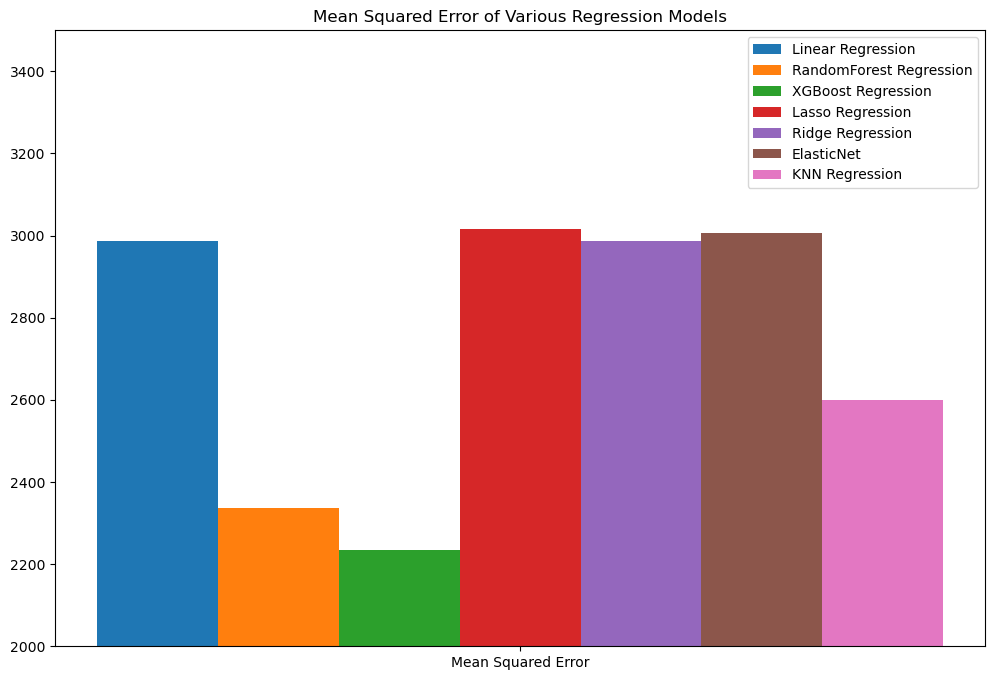

In [44]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["Mean Squared Error"]

linear_y = [linear_spuared]
randomf_y = [randomf_spuared]
xgb_y = [xgb_spuared]
lasso_y = [lasso_spuared]
ridge_y = [ridge_spuared]
elan_y = [elan_spuared]
KNN_y = [KNN_spuared]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(2000, 3500)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('Mean Squared Error of Various Regression Models')

In [45]:
print(randomf_y)

[2335.8643919824767]


Text(0.5, 1.0, 'Mean Absolute Error of Various Regression Models')

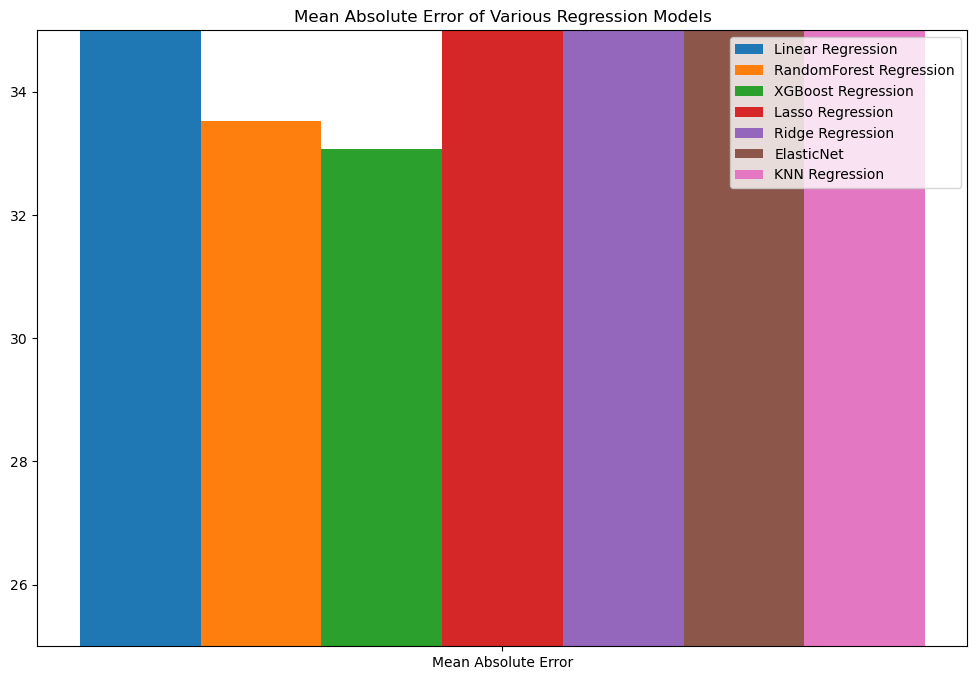

In [46]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["Mean Absolute Error"]

linear_y = [linear_absolute]
randomf_y = [randomf_absolute]
xgb_y = [xgb_absolute]
lasso_y = [lasso_absolute]
ridge_y = [ridge_absolute]
elan_y = [elan_absolute]
KNN_y = [KNN_absolute]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(25, 35)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('Mean Absolute Error of Various Regression Models')

In [47]:
print(randomf_y)

[33.53525772949665]


Text(0.5, 1.0, 'R2 Score of Various Regression Models')

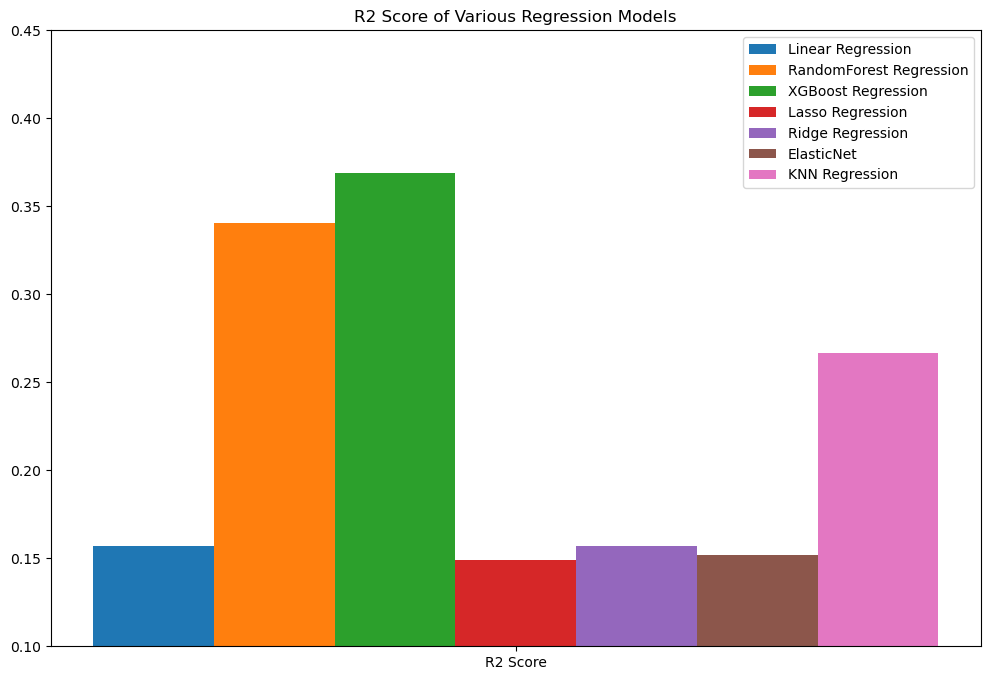

In [48]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["R2 Score"]

linear_y = [linear_r2_score]
randomf_y = [randomf_r2_score]
xgb_y = [xgb_r2_score]
lasso_y = [lasso_r2_score]
ridge_y = [ridge_r2_score]
elan_y = [elan_r2_score]
KNN_y = [KNN_r2_score]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(0.1, 0.45)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('R2 Score of Various Regression Models')

In [49]:
print(randomf_y)

[0.34073855274293785]


In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
radomf_g_model = RandomForestRegressor(random_state=300)

In [52]:
parameter = {
    'n_estimators': [100, 300, 500],  
    'max_depth': [None, 6, 12],       
    'min_samples_split': [2, 5],      
    'min_samples_leaf': [1, 2],       
    'max_features': [1.0, 'sqrt', 0.8],  
    'criterion': ['squared_error', 'absolute_error']
}

In [53]:
grid_search = GridSearchCV(
    estimator=radomf_g_model,
    param_grid=parameter,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [54]:
tuning_model = make_pipeline(StandardScaler(), grid_search)
tuning_model.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestRegressor(random_state=300),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error',
                                                        'absolute_error'],
                                          'max_depth': [None, 6, 12],
                                          'max_features': [1.0, 'sqrt', 0.8],
                                          'min_samples_leaf': [1, 2],
                                          'min_samples_split': [2, 5],
                                          'n_estimators': [100, 300, 500]},
                              scoring='r2', verbose=1))])

In [55]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [56]:
tuning_pred = tuning_model.predict(X_test)

In [57]:
tuning_spuared = mean_squared_error(Y_test, tuning_pred)
tuning_absolute = mean_absolute_error(Y_test, tuning_pred)
tuning_r2_score = r2_score(Y_test, tuning_pred)

In [58]:
print(tuning_spuared)
print(tuning_absolute)
print(tuning_r2_score)

2338.566792925453
32.93124003002835
0.33997584204669606


In [64]:
randomf_new_model = RandomForestRegressor(
    criterion='squared_error',
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=500,
    random_state=300
)

In [65]:
randomf_new_model.fit(X_train, Y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, n_estimators=500,
                      random_state=300)

In [66]:
importances = randomf_new_model.feature_importances_

feature_importance = list(zip(X_train.columns, importances))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

500m내_사고건수_가중치: 0.2244
500m내_휴게음식점가중치: 0.1529
500m내_자전거도로가중치: 0.0958
500m내_교차로가중치: 0.0932
500m내_대여소가중치: 0.0924
500m내_버스정류소가중치: 0.0790
동: 0.0778
500m내_지하철역가중치: 0.0753
500m내_자전거보관소가중치: 0.0685
500m내_고등학교가중치: 0.0282
500m내_관광지_여부: 0.0081
500m내_대학교가중치: 0.0042


In [67]:
X_train_new = X_train.drop(columns=['500m내_대학교가중치'])
X_test_new = X_test.drop(columns=['500m내_대학교가중치'])
randomf_new_model.fit(X_train_new, Y_train)

randomf_new_pred = randomf_new_model.predict(X_test_new)

randomf_new_spuared = mean_squared_error(Y_test, randomf_new_pred)
randomf_new_absolute = mean_absolute_error(Y_test, randomf_new_pred)
randomf_new_r2_score = r2_score(Y_test, randomf_new_pred)

print(randomf_new_spuared)
print(randomf_new_absolute)
print(randomf_new_r2_score)


2336.430740133284
32.97161152700858
0.3405787097731001


In [68]:
X_train_new = X_train.drop(columns=['500m내_대학교가중치','500m내_관광지_여부'])
X_test_new = X_test.drop(columns=['500m내_대학교가중치','500m내_관광지_여부'])
randomf_new_model.fit(X_train_new, Y_train)

randomf_new_pred = randomf_new_model.predict(X_test_new)

randomf_new_spuared = mean_squared_error(Y_test, randomf_new_pred)
randomf_new_absolute = mean_absolute_error(Y_test, randomf_new_pred)
randomf_new_r2_score = r2_score(Y_test, randomf_new_pred)

print(randomf_new_spuared)
print(randomf_new_absolute)
print(randomf_new_r2_score)

2352.527143145996
32.99387473691726
0.3360357500095895
